In [1]:
#https://bdmep.inmet.gov.br/
#https://portal.inmet.gov.br/dadoshistoricos
#https://www.snirh.gov.br/hidroweb/apresentacao
#https://github.com/taleswsouza/ANA-hidroweb

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [5]:
def stations_points(path, tipo, long, lat):
    e = pd.read_csv(path,  delimiter=';')
    e [lat] = e[lat].str.replace(',', '.').astype(float)
    e[long] = e[long].str.replace(',', '.').astype(float)
    e['geometry'] = e.apply(lambda row: Point(row[long], row[lat]), axis=1)
    e["tipo"] = tipo
    gdf = gpd.GeoDataFrame(e, geometry='geometry').set_crs(epsg=4674)
    return gdf

In [6]:
#gdf_aut = stations_points("CatalogoEstaçõesAutomáticas.csv", "automatica", 'VL_LONGITUDE', 'VL_LATITUDE')
#gdf_conv = stations_points("CatalogoEstaçõesConvencionais.csv", "convencional", 'VL_LONGITUDE', 'VL_LATITUDE')

In [7]:
#gdf_e = gpd.GeoDataFrame(pd.concat([gdf_aut, gdf_conv]), geometry = "geometry", crs = "EPSG: 4674").reset_index(drop=True)
#gdf_e.sample(5)

In [8]:
#gdf_e.to_file("estacoes.geojson")

In [32]:
e_hidro = stations_points("./dados_pluviometricos/EstaçõesHidrometeorológicas.csv", "hidrometeorologica", "Longitude", "Latitude")
e_hidro = e_hidro[e_hidro.TipoEstacao == "Pluviométrica"][["Codigo", "Nome", "TipoEstacao", "Operando", "geometry"]]
e_hidro["Codigo"] = e_hidro["Codigo"].str.replace(".", "").astype(int)
e_hidro.sample(3)

,Codigo,Nome,TipoEstacao,Operando,geometry
188,1550006,BALNEÁRIO CACHOEIRA GRANDE,Pluviométrica,Sim,POINT (-50.172 -15.922)
144,1548041,RADIOBRAS,Pluviométrica,Sim,POINT (-48.132 -15.599)
27,1547021,BARREIRO DF-130,Pluviométrica,Sim,POINT (-47.627 -15.839)


In [33]:
#e_hidro.to_file("estacoes_pluv_ana.geojson")

In [34]:
bh = gpd.read_file("../bh_lago_paranoa.geojson")
bh = bh.to_crs("EPSG:31983")
bh.geometry = bh.geometry.buffer(10000)
bh = bh.to_crs("EPSG:4674")

<Axes: >

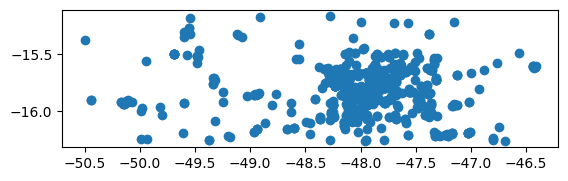

In [25]:
e_hidro.to_file(

In [36]:
e_bh_ana = gpd.overlay(e_hidro, bh, how = "intersection")
e_bh_ana

,Codigo,Nome,TipoEstacao,Operando,bacia_hidr,uh_label,geometry
0,1547004,BRASÍLIA,Pluviométrica,Sim,Rio Paranoá,UH 13 Riacho Fundo,POINT (-47.923 -15.79)
1,1547004,BRASÍLIA,Pluviométrica,Sim,Rio Paranoá,UH 09 Lago Paranoá,POINT (-47.923 -15.79)
2,1547004,BRASÍLIA,Pluviométrica,Sim,Rio Paranoá,UH 17 Ribeirão do Gama,POINT (-47.923 -15.79)
3,1547004,BRASÍLIA,Pluviométrica,Sim,Rio Paranoá,UH 07 Córrego Bananal,POINT (-47.923 -15.79)
4,1547004,BRASÍLIA,Pluviométrica,Sim,Rio Paranoá,UH 18 Ribeirão do Torto,POINT (-47.923 -15.79)
...,...,...,...,...,...,...,...
189,1648031,NOVO GAMA_Parque Estrela Dalva VI,Pluviométrica,Sim,Rio Paranoá,UH 17 Ribeirão do Gama,POINT (-48.032 -16.06)
190,9999999,ESTACAO TESTE_PLU,Pluviométrica,Sim,Rio Paranoá,UH 13 Riacho Fundo,POINT (-47.945 -15.818)
191,9999999,ESTACAO TESTE_PLU,Pluviométrica,Sim,Rio Paranoá,UH 09 Lago Paranoá,POINT (-47.945 -15.818)
192,9999999,ESTACAO TESTE_PLU,Pluviométrica,Sim,Rio Paranoá,UH 17 Ribeirão do Gama,POINT (-47.945 -15.818)


In [37]:
#e_bh_ana.to_file("estacoes_pluv_bh_ana.geojson")